In [6]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv("final_result_impl_huffman.csv")
data['obj2'].transform(lambda x: 1/x)
print(data['obj2'])

0        745
1        809
2        789
3        827
4        903
5        943
6        937
7        968
8        783
9        802
10       792
11       880
12       900
13       972
14       948
15       992
16       790
17       848
18       842
19       915
20       967
21      1017
22       995
23      1042
24       946
25       949
26       906
27       987
28      1043
29      1074
        ... 
1986    1926
1987    1889
1988    1871
1989    1781
1990    1799
1991    1900
1992    1913
1993    2039
1994    2011
1995    2088
1996    1962
1997    2002
1998    2012
1999    2108
2000    1718
2001    1820
2002    1888
2003    1930
2004    1783
2005    1839
2006    1883
2007    1960
2008    1839
2009    1995
2010    2045
2011    2202
2012    2066
2013    2100
2014    2004
2015    2172
Name: obj2, Length: 2016, dtype: int64


(0, 0.0013422818791946308)

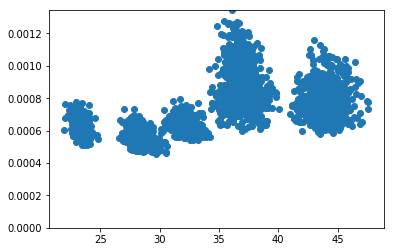

In [22]:
fig, ax = plt.subplots()
ydata = data["obj2"].transform(lambda x: 1/x)
ax.scatter(data["obj1"], ydata)
ax.set_ylim(0, max(ydata))